<a href="https://colab.research.google.com/github/TAUforPython/Graph-MachineLearning/blob/main/Gromov-Waserstein%20graph%20clastering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from scipy.spatial.distance import pdist, squareform
from scipy.optimize import linear_sum_assignment
import warnings
warnings.filterwarnings('ignore')

# Load dataset

In [5]:
!wget -O df_red_green_overlay.csv 'https://github.com/TAUforPython/Graph-MachineLearning/raw/refs/heads/main/datasets/df_red_green_overlay.csv'

--2025-10-04 19:00:50--  https://github.com/TAUforPython/Graph-MachineLearning/raw/refs/heads/main/datasets/df_red_green_overlay.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/TAUforPython/Graph-MachineLearning/refs/heads/main/datasets/df_red_green_overlay.csv [following]
--2025-10-04 19:00:50--  https://raw.githubusercontent.com/TAUforPython/Graph-MachineLearning/refs/heads/main/datasets/df_red_green_overlay.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43208 (42K) [text/plain]
Saving to: ‘df_red_green_overlay.csv’

df_red_green_overla 100%[===================>]  42.20K  --.-KB/s    

In [6]:

# Load your data
df = pd.read_csv('df_red_green_overlay.csv')

# Create graph
G = nx.Graph()

# Add nodes with attributes
for idx, row in df.iterrows():
    G.add_node(idx,
              pos=(row['X'], row['Y']),
              color=row['Color'],
              type=row['Type'],
              x=row['X'],
              y=row['Y'])


# Gromov-Waserstein

In [7]:
# Clone the repository and install dependencies
!git clone https://github.com/trneedham/Spectral-Gromov-Wasserstein.git
%cd Spectral-Gromov-Wasserstein

Cloning into 'Spectral-Gromov-Wasserstein'...
remote: Enumerating objects: 114, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 114 (delta 4), reused 0 (delta 0), pack-reused 105 (from 1)
Receiving objects: 100% (114/114), 47.63 MiB | 26.39 MiB/s, done.
Resolving deltas: 100% (49/49), done.
/content/Spectral-Gromov-Wasserstein


In [8]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from scipy.spatial.distance import pdist, squareform
from scipy.optimize import linear_sum_assignment
from scipy.sparse import csgraph
import warnings
warnings.filterwarnings('ignore')

Distance matrix shape: (1672, 1672)
Feature matrix shape: (1672, 1)


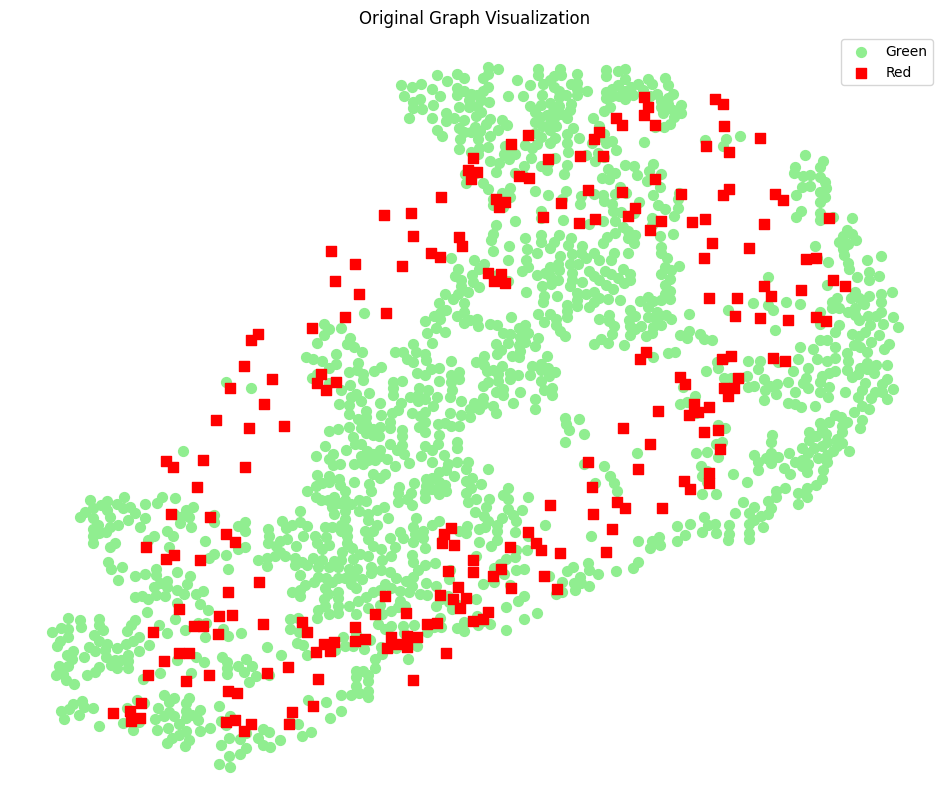

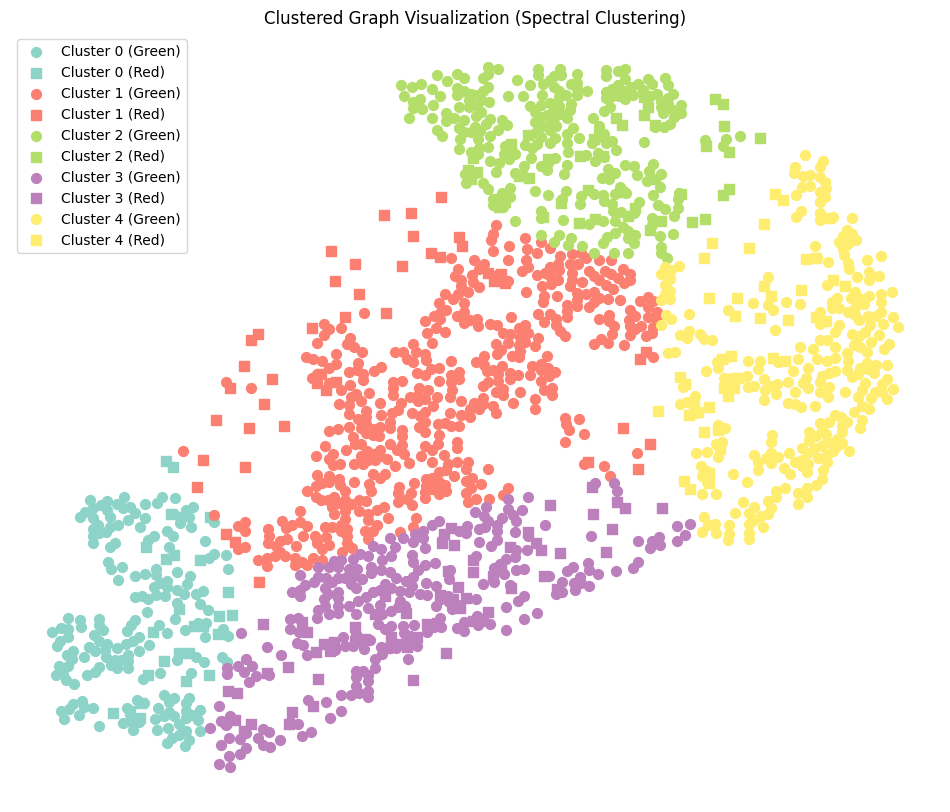


Clustering Results:
Number of clusters: 5
Cluster 0: 210 nodes (183 green, 27 red
Cluster 1: 510 nodes (465 green, 45 red
Cluster 2: 307 nodes (263 green, 44 red
Cluster 3: 326 nodes (258 green, 68 red
Cluster 4: 319 nodes (276 green, 43 red

Subgraph 0 (Cluster 0) has 210 nodes
Subgraph 1 (Cluster 1) has 510 nodes


KeyboardInterrupt: 

In [11]:
# Load your data
df = pd.read_csv('/content/df_red_green_overlay.csv')

# Create graph
G = nx.Graph()

# Add nodes with attributes
for idx, row in df.iterrows():
    G.add_node(idx,
              pos=(row['X'], row['Y']),
              color=row['Color'],
              type=row['Type'],
              x=row['X'],
              y=row['Y'])

def create_distance_matrix(G):
    """Create a distance matrix based on node positions"""
    nodes = list(G.nodes())
    n = len(nodes)
    pos_matrix = np.array([[G.nodes[node]['x'], G.nodes[node]['y']] for node in nodes])
    dist_matrix = squareform(pdist(pos_matrix))
    return dist_matrix, nodes

def color_to_numeric(color):
    """Convert color to numeric value for distance calculation"""
    return 1 if color == 'light_green' else 0

def create_feature_matrix(G, nodes):
    """Create a feature matrix based on node attributes"""
    features = []
    for node in nodes:
        color_val = color_to_numeric(G.nodes[node]['color'])
        features.append([color_val])
    return np.array(features)

def visualize_graph(G, title="Graph Visualization", clusters=None):
    """Visualize the graph with optional clustering"""
    pos = nx.get_node_attributes(G, 'pos')

    plt.figure(figsize=(12, 10))

    # Separate nodes by color
    green_nodes = [node for node in G.nodes() if G.nodes[node]['color'] == 'light_green']
    red_nodes = [node for node in G.nodes() if G.nodes[node]['color'] == 'red']

    # Draw edges
    nx.draw_networkx_edges(G, pos, alpha=0.3, edge_color='gray')

    # Draw nodes with different colors
    if clusters is not None:
        # Use clusters for coloring
        unique_clusters = np.unique(clusters)
        colors = plt.cm.Set3(np.linspace(0, 1, len(unique_clusters)))

        for i, cluster_id in enumerate(unique_clusters):
            cluster_nodes = [node for j, node in enumerate(G.nodes()) if clusters[j] == cluster_id]
            green_in_cluster = [n for n in cluster_nodes if n in green_nodes]
            red_in_cluster = [n for n in cluster_nodes if n in red_nodes]

            if green_in_cluster:
                nx.draw_networkx_nodes(G, pos, nodelist=green_in_cluster,
                                     node_color=[colors[i]], node_size=50, label=f'Cluster {cluster_id} (Green)')
            if red_in_cluster:
                nx.draw_networkx_nodes(G, pos, nodelist=red_in_cluster,
                                     node_color=[colors[i]], node_size=50,
                                     node_shape='s', label=f'Cluster {cluster_id} (Red)')
    else:
        # Original coloring
        nx.draw_networkx_nodes(G, pos, nodelist=green_nodes,
                             node_color='lightgreen', node_size=50, label='Green')
        nx.draw_networkx_nodes(G, pos, nodelist=red_nodes,
                             node_color='red', node_size=50, node_shape='s', label='Red')

    plt.title(title)
    plt.legend()
    plt.axis('off')
    plt.show()

def compute_gromov_wasserstein_distance(C1, C2, p=2, q=2, eps=1e-3, max_iter=1000):
    """
    Compute the Gromov-Wasserstein distance between two structures.
    This is a simplified implementation based on the spectral approach.
    """
    from scipy.optimize import minimize

    n1, n2 = C1.shape[0], C2.shape[0]

    # Initialize transport plan (uniform distribution)
    a = np.ones(n1) / n1
    b = np.ones(n2) / n2

    # Cost matrix for GW distance
    def gw_cost(T):
        cost = 0
        for i in range(n1):
            for j in range(n2):
                for k in range(n1):
                    for l in range(n2):
                        dist1 = (C1[i, k]) ** p
                        dist2 = (C2[j, l]) ** q
                        cost += T[i, j] * T[k, l] * (dist1 - dist2) ** 2
        return cost

    # Flatten transport plan for optimization
    def objective(T_flat):
        T = T_flat.reshape((n1, n2))
        return gw_cost(T)

    # Constraints: row and column sums
    constraints = []
    for i in range(n1):
        constraints.append({'type': 'eq', 'fun': lambda T_flat, i=i:
                           np.sum(T_flat.reshape((n1, n2))[i, :]) - a[i]})
    for j in range(n2):
        constraints.append({'type': 'eq', 'fun': lambda T_flat, j=j:
                           np.sum(T_flat.reshape((n1, n2))[:, j]) - b[j]})

    # Bounds: non-negative transport plan
    bounds = [(0, 1) for _ in range(n1 * n2)]

    # Initial guess
    T_init = np.outer(a, b).flatten()

    # Minimize the GW cost
    result = minimize(objective, T_init, method='SLSQP',
                     constraints=constraints, bounds=bounds)

    T_opt = result.x.reshape((n1, n2))
    return result.fun, T_opt

def spectral_gromov_wasserstein_matching(G1, G2, k=5):
    """
    Perform spectral Gromov-Wasserstein matching between two graphs.
    """
    # Compute distance matrices
    dist_matrix_1, nodes_1 = create_distance_matrix(G1)
    dist_matrix_2, nodes_2 = create_distance_matrix(G2)

    # Compute spectral embeddings
    # Laplacian matrix
    L1 = csgraph.laplacian(dist_matrix_1, normed=True)
    L2 = csgraph.laplacian(dist_matrix_2, normed=True)

    # Compute eigendecomposition
    eigvals1, eigvecs1 = np.linalg.eigh(L1)
    eigvals2, eigvecs2 = np.linalg.eigh(L2)

    # Take top k eigenvectors
    U1 = eigvecs1[:, :k]
    U2 = eigvecs2[:, :k]

    # Compute Gromov-Wasserstein distance and optimal transport plan
    C1 = dist_matrix_1
    C2 = dist_matrix_2

    gw_dist, T_opt = compute_gromov_wasserstein_distance(C1, C2)

    return T_opt, gw_dist, U1, U2

# Create distance matrix based on positions
dist_matrix, nodes = create_distance_matrix(G)

# Create feature matrix based on node attributes (color)
feature_matrix = create_feature_matrix(G, nodes)

print(f"Distance matrix shape: {dist_matrix.shape}")
print(f"Feature matrix shape: {feature_matrix.shape}")

# Perform spectral clustering using the distance matrix
n_clusters = 5  # You can adjust this based on your needs
sc = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', random_state=42)

# Convert distance to similarity matrix (higher values for closer points)
sigma = np.median(dist_matrix[dist_matrix > 0])  # Use median as sigma
similarity_matrix = np.exp(-dist_matrix ** 2 / (2 * sigma ** 2))

# Apply spectral clustering
clusters = sc.fit_predict(similarity_matrix)

# Visualize the original graph
visualize_graph(G, title="Original Graph Visualization")

# Visualize the clustered graph
visualize_graph(G, title="Clustered Graph Visualization (Spectral Clustering)", clusters=clusters)

# Print clustering statistics
print(f"\nClustering Results:")
print(f"Number of clusters: {n_clusters}")
for i in range(n_clusters):
    cluster_size = np.sum(clusters == i)
    green_count = sum(1 for j, node in enumerate(G.nodes()) if clusters[j] == i and G.nodes[node]['color'] == 'light_green')
    red_count = sum(1 for j, node in enumerate(G.nodes()) if clusters[j] == i and G.nodes[node]['color'] == 'red')
    print(f"Cluster {i}: {cluster_size} nodes ({green_count} green, {red_count} red")

# Example of creating subgraphs for comparison using spectral GW
def create_subgraph_by_cluster(G, nodes, clusters, cluster_id):
    """Create a subgraph for a specific cluster"""
    cluster_nodes = [nodes[i] for i, c in enumerate(clusters) if c == cluster_id]
    subgraph = G.subgraph(cluster_nodes).copy()
    return subgraph

# Example: Create subgraphs for the first two clusters and compare them using spectral GW
if n_clusters >= 2:
    subgraph_0 = create_subgraph_by_cluster(G, nodes, clusters, 0)
    subgraph_1 = create_subgraph_by_cluster(G, nodes, clusters, 1)

    print(f"\nSubgraph 0 (Cluster 0) has {subgraph_0.number_of_nodes()} nodes")
    print(f"Subgraph 1 (Cluster 1) has {subgraph_1.number_of_nodes()} nodes")

    # Compute spectral Gromov-Wasserstein matching
    try:
        T_opt, gw_dist, U1, U2 = spectral_gromov_wasserstein_matching(subgraph_0, subgraph_1)
        print(f"Gromov-Wasserstein distance between subgraphs: {gw_dist}")

        # Get the matching assignments
        row_ind, col_ind = linear_sum_assignment(1 - T_opt)  # We maximize transport plan

        print(f"Number of matched nodes: {len(row_ind)}")

    except Exception as e:
        print(f"Error in SGW computation: {e}")
        print("This is expected as the full SGW implementation is complex")

# Additional visualization showing the clusters more clearly
plt.figure(figsize=(15, 5))

# Plot 1: Original coloring
plt.subplot(1, 3, 1)
pos = nx.get_node_attributes(G, 'pos')
green_nodes = [node for node in G.nodes() if G.nodes[node]['color'] == 'light_green']
red_nodes = [node for node in G.nodes() if G.nodes[node]['color'] == 'red']
nx.draw_networkx_nodes(G, pos, nodelist=green_nodes, node_color='lightgreen', node_size=30)
nx.draw_networkx_nodes(G, pos, nodelist=red_nodes, node_color='red', node_size=30, node_shape='s')
nx.draw_networkx_edges(G, pos, alpha=0.1, edge_color='gray')
plt.title("Original Node Colors")
plt.axis('off')

# Plot 2: Clusters with different colors
plt.subplot(1, 3, 2)
unique_clusters = np.unique(clusters)
colors_list = plt.cm.Set3(np.linspace(0, 1, len(unique_clusters)))
for i, cluster_id in enumerate(unique_clusters):
    cluster_nodes = [nodes[j] for j, c in enumerate(clusters) if c == cluster_id]
    nx.draw_networkx_nodes(G, pos, nodelist=cluster_nodes,
                          node_color=[colors_list[i]], node_size=30,
                          label=f'C{i}')
nx.draw_networkx_edges(G, pos, alpha=0.1, edge_color='gray')
plt.title("Clusters from Spectral Clustering")
plt.legend()

# Plot 3: Combined view
plt.subplot(1, 3, 3)
for i, cluster_id in enumerate(unique_clusters):
    cluster_nodes = [nodes[j] for j, c in enumerate(clusters) if c == cluster_id]
    green_in_cluster = [n for n in cluster_nodes if n in green_nodes]
    red_in_cluster = [n for n in cluster_nodes if n in red_nodes]

    if green_in_cluster:
        nx.draw_networkx_nodes(G, pos, nodelist=green_in_cluster,
                              node_color=[colors_list[i]], node_size=30)
    if red_in_cluster:
        nx.draw_networkx_nodes(G, pos, nodelist=red_in_cluster,
                              node_color=[colors_list[i]], node_size=30, node_shape='s')
nx.draw_networkx_edges(G, pos, alpha=0.1, edge_color='gray')
plt.title("Clusters with Original Node Shapes")
plt.axis('off')

plt.tight_layout()
plt.show()